In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
X = 2*np.random.randn(100, 1)
y = 4+3*X+np.random.randn(100, 1)

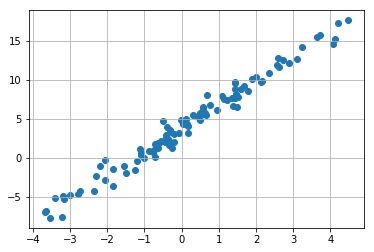

In [4]:
plt.scatter(X, y)
plt.rcParams['figure.figsize'] = (10, 10)
plt.grid()
plt.show()

## Linear regression using normal equation

Closed form equation
$$\theta=(X_TX)^{-1}X_Ty$$

In [5]:
X_b=np.hstack((np.ones((100,1)),X))
theta= np.linalg.inv((X_b.T.dot(X_b))).dot(X_b.T).dot(y)
y_predicted=X_b.dot(theta)

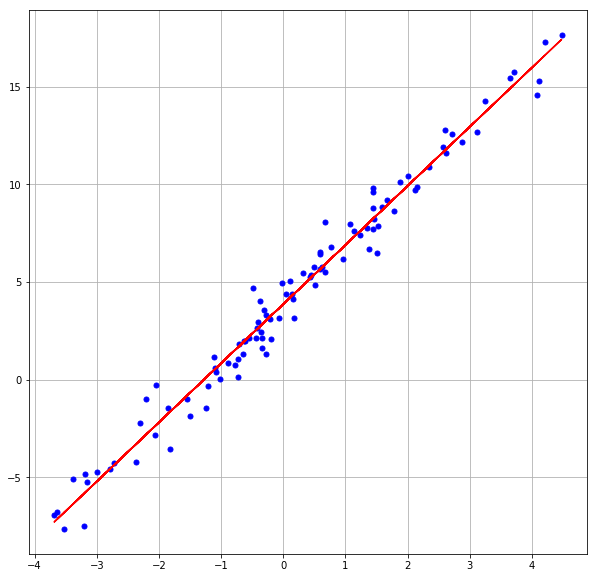

In [6]:
# Plot actual and predicted values
plt.plot(X,y,'b.',markersize=10)
plt.plot(X,y_predicted,'r-')
plt.grid()
plt.show()

## Linear regression using scikit-learn

In [7]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print('Intercept: ', lin_reg.intercept_)
print('Coeff: ',lin_reg.coef_)

Intercept:  [3.86654456]
Coeff:  [[3.02761778]]


In [9]:
y_predicted=lin_reg.predict(X)

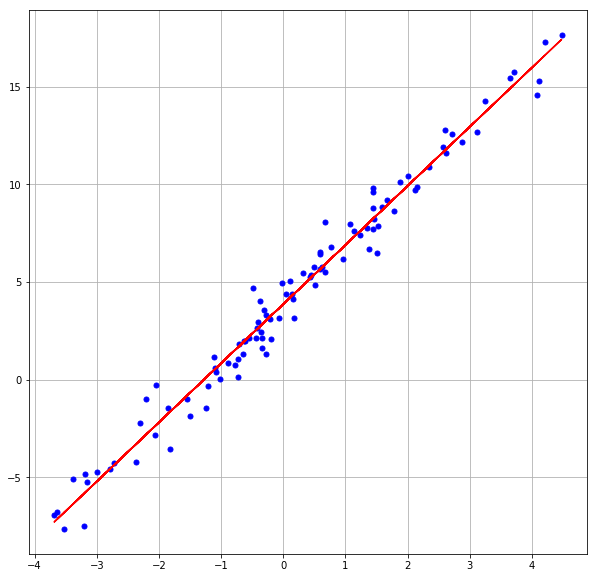

In [10]:
plt.plot(X,y,'b.',markersize=10)
plt.plot(X,y_predicted,'r-')
plt.grid()
plt.show()

## Implementing batch gradient descent

Shapes:
- $X(m,n)$
- $y(m,1)$
- $\theta(n,1)$

Batch gradient descent equation
$$\nabla_\theta MSE(\theta)=\frac{2}{m}X^T(X\theta-y)$$

In [11]:
learning_rate=0.1
m=100
n_iterations=1000

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=(2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-learning_rate*gradients
    
print("Theta: ")
print(theta)

Theta: 
[[3.86654456]
 [3.02761778]]


## Implementing stochastic gradient descent

In [12]:
n_epoch = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters
m = 100


def learning_schedule(t):
    return t0/(t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epoch):

    # To make sure that all training examples are used in training
    random_indices = np.random.permutation(m)
    for i in range(m):
        random_index = random_indices[i]

        # Train a single training example at a time
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)

        learning_rate = learning_schedule(epoch*m+i)
        theta = theta-learning_rate*gradients


print("Theta: ")
print(theta)

Theta: 
[[3.86648644]
 [3.02178179]]


## Stochastic gradient descent using scikit-learn

In [13]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [14]:
print('Intercept: ', sgd_reg.intercept_)
print('Coeff: ', sgd_reg.coef_)

Intercept:  [3.90660554]
Coeff:  [3.02747684]


## Polynomial regression

In [15]:
m = 100
X = 6*np.random.rand(m, 1)-2
y = 0.5*X**2+X+2+np.random.randn(m, 1)

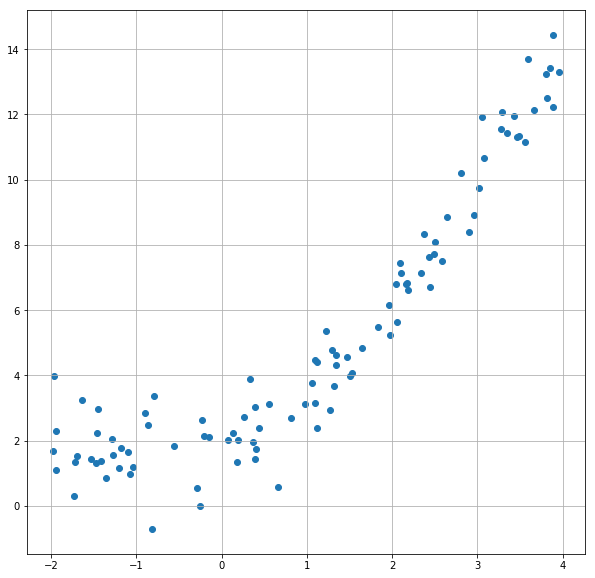

In [16]:
plt.scatter(X, y)
plt.grid()
plt.show()

In [17]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)

In [18]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
print('Intercept: ',lin_reg.intercept_)
print('Coefficient: ',lin_reg.coef_)

Intercept:  [1.96188289]
Coefficient:  [[0.98592133 0.5288441 ]]


In [19]:
C2=lin_reg.coef_[0][1]
C1=lin_reg.coef_[0][0]
C0=lin_reg.intercept_[0]
y_predicted=C2*X**2+C1*X+C0

print('C2: ',C2)
print('C1: ',C1)
print('C0: ',C0)

C2:  0.5288440987663265
C1:  0.9859213284043542
C0:  1.961882887147362


In [20]:
X.shape

(100, 1)

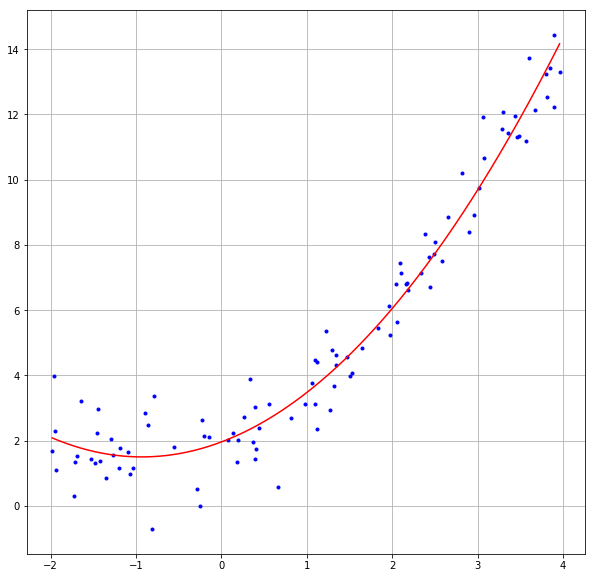

In [21]:
plt.plot(X,y,'b.')
X_new = np.linspace(X.min(),X.max(),num=500)
y_new= C2*X_new**2+C1*X_new+C0
plt.plot(X_new,y_new,'r-',markersize=15)
plt.grid()
plt.show()

## Learning curves
These are plots of the model’s performance on the training set and the validation set as a function of the training set size.

In [50]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,validation_errors=[],[]
    
    # Train model with different training set size and calculate errors on training and validation set
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        validation_errors.append(mean_squared_error(y_val,y_val_predict))
        
    return (train_errors,validation_errors)

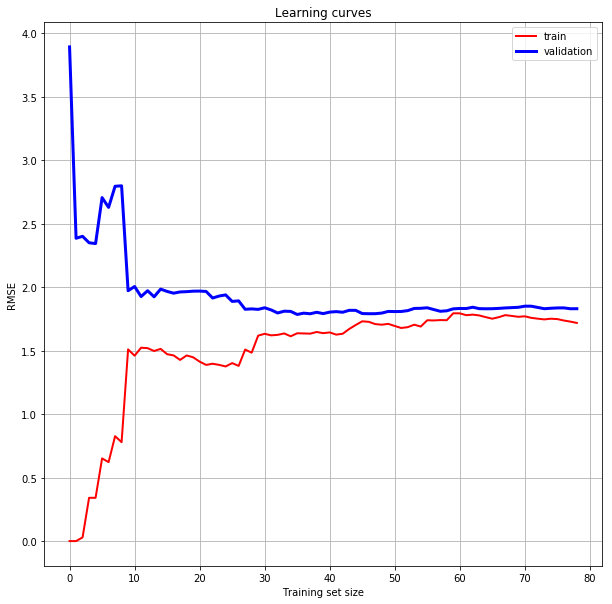

In [51]:
lin_reg = LinearRegression()
train_errors, validation_errors = plot_learning_curves(lin_reg, X, y)

# Plot learning curves
plt.plot(np.sqrt(train_errors),
         'r-', linewidth=2, label='train')
plt.plot(np.sqrt(validation_errors),
         'b-', linewidth=3, label='validation')
plt.legend(loc='upper right')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curves')
plt.grid()
plt.show()

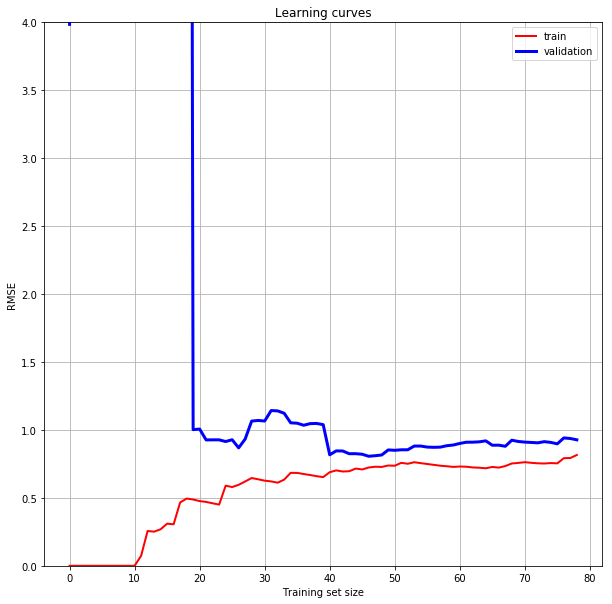

In [67]:
polynomial_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
train_errors, validation_errors = plot_learning_curves(polynomial_reg, X, y)
# Plot learning curves
plt.plot(np.sqrt(train_errors),
         'r-', linewidth=2, label='train')
plt.plot(np.sqrt(validation_errors),
         'b-', linewidth=3, label='validation')
plt.legend(loc='upper right')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curves')
plt.grid()
axes=plt.gca()
axes.set_ylim(0,4)
plt.show()

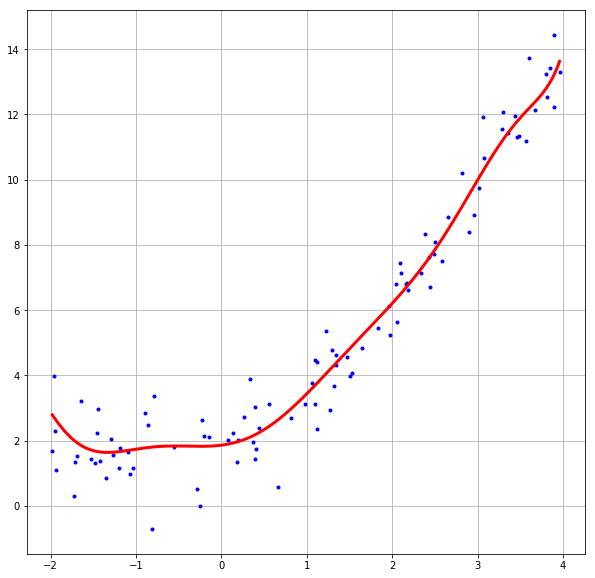

In [64]:
plt.plot(X, y, 'b.')
X_pred = np.linspace(X.min(), X.max(), 1000)
y_pred = polynomial_reg.predict(X_pred.reshape(-1, 1))
plt.plot(X_pred, y_pred, 'r-', linewidth=3)
plt.grid()
plt.show()

## Regularized linear models

### Ridge regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression. A regularization term equal to  $\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$  is added to the cost function.
Ridge regression cost function:
$$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$$

### Lasso regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $l_1$ norm of the weight vector instead of half the square of the $l_2$ norm. Lasso regression cost function:
$$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i|$$

### Elastic net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r.
Elastic Net cost function:
$$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^{n}|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$$

### Early stopping
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.